In [1]:
import Pkg
# Pkg.activate("./dibs_env")
Pkg.activate("/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/dibs_env")
ENV["PYTHON"]=""
Pkg.build("PyCall")

  Activating project at `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/dibs_env`
    Building Conda ─→ `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/6e47d11ea2776bc5627421d59cdcc1296c058071/build.log`
    Building PyCall → `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/53b8b07b721b77144a0fbbbc2675222ebf40a02d/build.log`


In [1]:
install_run = true
if install_run
    using Pkg
    Pkg.add(["Glob","FITSIO","Serialization", "HDF5", "DelimitedFiles"])
    Pkg.add(["StatsBase","Distributions","FreqTables", "LsqFit", "KrylovKit"])
    Pkg.add(["BinnedStatistics","KrylovKit","ImageTransformations", "Interpolations"])
    Pkg.add(["DataFrames", "ProgressMeter", "Distributed", "BenchmarkTools"])
    Pkg.add(["Healpix", "SkyCoords", "WCS"])
    Pkg.add(["LaTeXStrings", "Formatting", "Printf", "PyFormattedStrings"])
    Pkg.add(["Conda","PyCall","PyPlot", "Plots"])
end

#File Handling
using Glob, FITSIO, Serialization, HDF5, DelimitedFiles
# Stats
using StatsBase, LinearAlgebra, Distributions, FreqTables, LsqFit 
using BinnedStatistics, KrylovKit, ImageTransformations
# Computing
using DataFrames, ProgressMeter, Distributed, BenchmarkTools, Random, Interpolations
# Astro
using Healpix, SkyCoords, WCS
# Python Plotting Setup
using PyCall, LaTeXStrings, Formatting, Printf, PyFormattedStrings
using PyPlot, Plots
import PyPlot; const plt = PyPlot
mpltk=pyimport("mpl_toolkits.axes_grid1")
patches=pyimport("matplotlib.patches")
mplcolors=pyimport("matplotlib.colors")
mplani = pyimport("matplotlib.animation");
cc=pyimport("colorcet")
pyimport("sys")."stdout" = PyTextIO(stdout)
pyimport("sys")."stderr" = PyTextIO(stderr);
py"""
from scipy.stats import binned_statistic_2d
"""
plt.matplotlib.style.use("default")

    Updating registry at `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/.julia/environments/v1.8/Project.toml`
  No Changes to `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/.julia/environments/v1.8/Project.toml`
  No Changes to `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/.julia/environments/v1.8/Project.toml`
  No Changes to `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `/uufs/chpc.ut

In [2]:
andrew_dir = "/uufs/chpc.utah.edu/common/home/u6039752/scratch/zenodo/GaiaDIB/GaiaDIB_dat/"

star_msk, nansum = deserialize(andrew_dir*"priors/star_mask.jdat");
SNR_lst = h5read(andrew_dir*"priors/SNR_lst.h5","SNR_lst");
sig_noise = deserialize(andrew_dir*"priors/sig_noise.jdl")

delthres = 1.46
noisefact = 3.6;
chi2perdof = 0.15
covdet = h5read(andrew_dir*"priors/precomp_dust_2_analyticDeriv.h5","covdet")
covdet0 = median(covdet)

c = 299792.458; # in km/s
cwave = 8623.14
cwave_cent = 8623.47 # this was the center of the scan, not the actual cwave
mu0, sig0 = 1.85, 0.5
mu1, sig1 = 8623.47, 1

srng = -100:0.1:100
sigrng = 0.4:0.01:4;

xmin0 = 8460
xmax0 = 8700
wavex = xmin0:0.1:xmax0
maxw = maximum(wavex[star_msk])
minw = minimum(wavex[star_msk])

waveknown = [8618.647, 8619.457, 8620.792, 8623.969];
labknown =["FeI]", "SI", "TiI", "FeI"]
waveadd = [8620.508, 8622.438]
labadd = ["FeI", "NiI"]
wavebad = [8617.75, 8621.62, 8625.236, 8627.73]
labbad = ["CaI", "CaI]","FeI]","TiIII"]
wavelst = [waveknown, waveadd, wavebad, cwave]
lablst = [labknown, labadd, labbad,["DIB"]]
wavecolor = ["turquoise", "turquoise", "magenta", "black"];

In [3]:
cmap_wb = plt.cm.get_cmap("cet_CET_L16_r",512)
cmap_wb.set_bad(color=(0.7,0.7,0.7))

cmap_wb_u = plt.cm.get_cmap("cet_CET_L16_r",512)
cmap_wb_u.set_bad(color=(0.7,0.7,0.7))
cmap_wb_u.set_under(color=(0.7,0.7,0.7))

cmap_bwr = plt.cm.get_cmap("cet_CET_D1A",512)
cmap_bwr.set_bad(color=(0.7,0.7,0.7))

cmap_bwrg = plt.cm.get_cmap("cet_CET_D1",512)
cmap_bwrg.set_bad(color=(0.7,0.7,0.7))
cmap_bwrg.set_under(color=(0.5,0.8,0.5))
cmap_bwrg.set_over(color=(0.4,0.4,0.4))

cmap_exp = plt.cm.get_cmap("cet_CET_L12_r",512)
cmap_exp.set_bad(color=(0.6,0.6,0.6))

py"""
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap_text, minval=0.0, maxval=1.0, n=100):
    cmap = (plt.get_cmap(cmap_text,512)).copy()
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
"""

trunc_cmap_L6 = py"truncate_colormap('cet_CET_L6', 0.8, 0.0)"
trunc_warm_cmap = py"truncate_colormap('cet_CET_L8', 0.1, 0.9)";

py"""
import numpy as np
import matplotlib.colors as mcolors
colors = plt.cm.get_cmap("cet_CET_L6",512)(np.linspace(0.9,0.5,256))
colors = np.append(colors,plt.cm.get_cmap("cet_CET_L4",512)(np.linspace(0.5,0,256)),axis=0)
cmap_split = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=512)
"""
cmap_split = py"cmap_split"

py"""
import numpy as np
import matplotlib.colors as mcolors 
colors = [(0,0,0,0) for c in np.linspace(0,0.5,100)]
cmap_test = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=100)
"""
cmap_test = py"cmap_test";

cmap_test.set_bad(color=(0.7,0.7,0.7))
cmap_test.set_under(color=(0.5,0.8,0.5))
cmap_test.set_over(color=(0.4,0.4,0.4));

In [4]:
function colat_long_rad(glonin,glatin)
    return π/2 .- deg2rad(glatin), deg2rad(glonin)
end

function project_VLSR(u,v,w; rGVLSR = (10.6,10.7,7.6))
    return dot(rGVLSR,[u,v,w])
end

function trans(x)
    if x>180
        return x-360
    else
        return x
    end
end

fiqr(x) = iqr(x)./1.34896;

In [5]:
# MADGICS Catalog
f = h5open(andrew_dir*"dib_explore_v14.h5");
glon = read(f["glon"])
glat = read(f["glat"]);

U = read(f["U"])
V = read(f["V"])
W = read(f["W"])

X = read(f["X"])
Y = read(f["Y"])

ew = read(f["ew"])
ew_err = read(f["ew_err"])

lam = read(f["lam"])
lam_err = read(f["lam_err"]);

vdust = read(f["v_dust_lsr"]);
v_dust_lsr_COframe = read(f["v_dust_lsr_COframe"])
v_dust_lsr_err = read(f["v_dust_lsr_err"]);
v_star_bary = read(f["v_star_bary"])
v_star_bary_error = read(f["v_star_bary_error"])

sig = read(f["sig"])
sig_err = read(f["sig_err"]);

dib_snr = read(f["dib_snr"])
stellar_snr = read(f["stellar_snr"])

d_pc = read(f["r_med_geo"])
dkpc = d_pc./1000
r_lo_geo = read(f["r_lo_geo"])
r_hi_geo = read(f["r_hi_geo"]);

bayestar19 = read(f["bayestar19"])
close(f)

glon_trans = trans.(glon);

In [6]:
py"""
from dustmaps.config import config
config['data_dir'] = 'dustmaps/'
import dustmaps.sfd
dustmaps.sfd.fetch()
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.sfd import SFDQuery
sfd = SFDQuery()
"""

Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.
Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.


In [7]:
f = FITS(andrew_dir*"gaia_archive_results/RVS_astro-result.fits.gz")
RVS_source_id = read(f[2],"source_id")
ps = sortperm(RVS_source_id);
flags_gspspec = read(f[2],"flags_gspspec")[ps];
teff = read(f[2],"teff_gspspec")[ps]
logg = read(f[2],"logg_gspspec")[ps]
mh = read(f[2],"mh_gspspec")[ps]
close(f)

grvs = h5open(andrew_dir*"sources/gaia_rvs_lite.h5");
grvs_id = read(grvs["SOURCE_ID"]);
glon_rvs = read(grvs["GLON"]);
glat_rvs = read(grvs["GLAT"]);
# glat_teff = read(grvs["T_EFF"]);
close(grvs)

In [8]:
py"""
l = $glon_rvs
b = $glat_rvs
coords = SkyCoord(l*units.deg, b*units.deg, frame='galactic')
sfd_reddening = sfd(coords)
"""

sfd_red = 1 .* py"sfd_reddening";

In [9]:
function mask_gspspec_flag(flagstring)
    good = true
    if length(flagstring)==41
        for i=1:13
            good &= (flagstring[i].=='0')
        end
        return good
    else
        good = false
        return good
    end
end

mask_gspspec_flag (generic function with 1 method)

In [10]:
msk_flags_gspspec = mask_gspspec_flag.(flags_gspspec);

msk_inter = nansum .& (sfd_red.<0.05) .& msk_flags_gspspec
count(msk_inter), count(msk_inter)/length(msk_inter)

(65186, 0.06520914924798303)

In [11]:
ps1 = sortperm(SNR_lst[msk_inter]);

In [ ]:
basework = "/uufs/chpc.utah.edu/common/home/u6039752/scratch/working/"

fluxes = h5read(basework*"2022_11_28/sources/gaia_rvs.h5", "flux");
dfluxes = h5read(basework*"2022_11_28/sources/gaia_rvs.h5", "dflux");

In [ ]:
masked_fluxes = fluxes[star_msk,msk_inter][:,ps1];
masked_dfluxes = dfluxes[star_msk,msk_inter][:,ps1];
masked_teffs = teff[msk_inter][ps1];
masked_logg = logg[msk_inter][ps1];
masked_mh = mh[msk_inter][ps1];
masked_snrs = SNR_lst[msk_inter][ps1];

In [ ]:
num_bins = 50

temp_hist, snr_bins, temp_bins, _  = plt.hist2D(log10.(SNR_lst[msk_inter][ps1]), masked_teffs, bins=num_bins, norm = mplcolors.LogNorm())
plt.colorbar()
plt.xlabel("log(SNR)")
plt.ylabel("Teff")
plt.show()

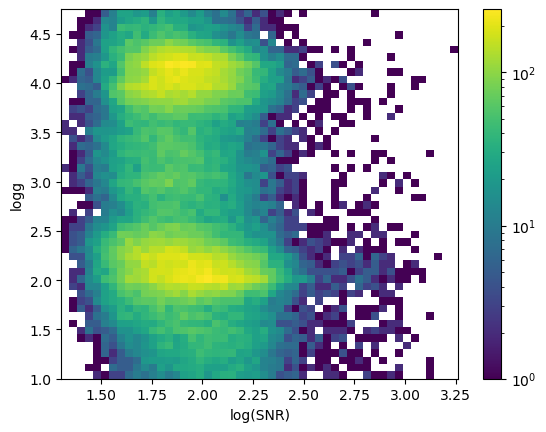

PyObject Text(24.000000000000007, 0.5, 'logg')

In [132]:
logg_hist, snr_bins, logg_bins, _ = plt.hist2D(log10.(SNR_lst[msk_inter][ps1]), masked_logg, bins=num_bins, norm = mplcolors.LogNorm())
plt.colorbar()
plt.xlabel("log(SNR)")
plt.ylabel("logg")

In [35]:
argmax(temp_hist)

CartesianIndex(7, 6)

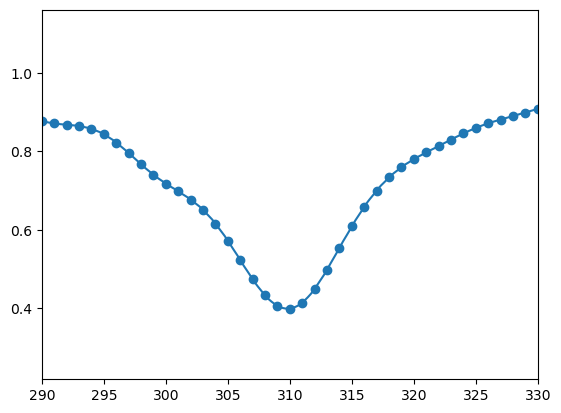

30885

In [36]:
mask = (snr_bins[argmax(temp_hist)[1]] .< log10.(masked_snrs) .< snr_bins[argmax(temp_hist)[1] + 1]) .& (temp_bins[argmax(temp_hist)[2]] .< masked_teffs .< temp_bins[argmax(temp_hist)[2] + 1]) .& (masked_logg .< 3.5) 
template = mean(masked_fluxes[:,mask], dims=2);

itp = Interpolations.interpolate(template[:,1], Interpolations.Lanczos());
etp = Interpolations.extrapolate(itp,0)
new_range = 1:0.01:2189
smooth_template = etp(new_range)
plt.scatter(1:2189, template)
plt.plot(new_range, smooth_template)
xlim(290,330)

template_argmin_1 = 29000 + argmin(smooth_template[29000:33000])

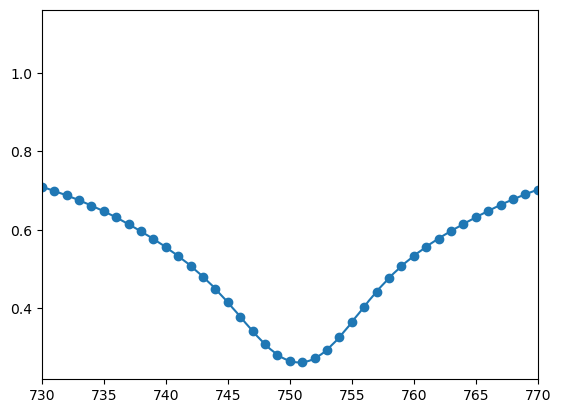

74980

In [37]:
mask = (snr_bins[argmax(temp_hist)[1]] .< log10.(masked_snrs) .< snr_bins[argmax(temp_hist)[1] + 1]) .& (temp_bins[argmax(temp_hist)[2]] .< masked_teffs .< temp_bins[argmax(temp_hist)[2] + 1]) .& (masked_logg .< 3.5) 
template = mean(masked_fluxes[:,mask], dims=2);

itp = Interpolations.interpolate(template[:,1], Interpolations.Lanczos());
etp = Interpolations.extrapolate(itp,0)
new_range = 1:0.01:2189
smooth_template = etp(new_range)
plt.scatter(1:2189, template)
plt.plot(new_range, smooth_template)

xlim(730,770)
template_argmin_2 = 73000 + argmin(smooth_template[73000:77000])

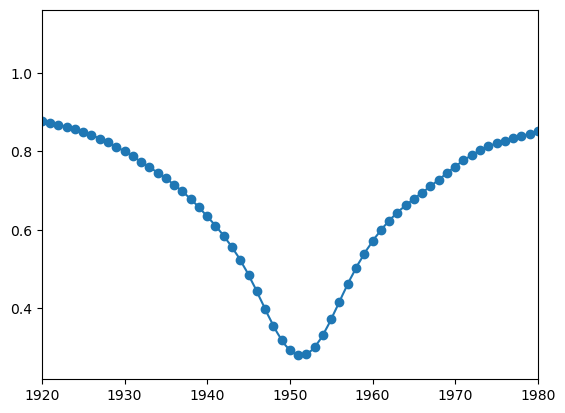

195033

In [38]:
mask = (snr_bins[argmax(temp_hist)[1]] .< log10.(masked_snrs) .< snr_bins[argmax(temp_hist)[1] + 1]) .& (temp_bins[argmax(temp_hist)[2]] .< masked_teffs .< temp_bins[argmax(temp_hist)[2] + 1]) .& (masked_logg .< 3.5) 
template = mean(masked_fluxes[:,mask], dims=2);

itp = Interpolations.interpolate(template[:,1], Interpolations.Lanczos());
etp = Interpolations.extrapolate(itp,0)
new_range = 1:0.01:2189
smooth_template = etp(new_range)
plt.scatter(1:2189, template)
plt.plot(new_range, smooth_template)
xlim(1920,1980)

template_argmin_3 = 192000 + argmin(smooth_template[192000:198000])

In [39]:
size(masked_fluxes)

(2189, 65186)

In [40]:
length(snr_bins)

21

In [136]:
average_pixels_off_snr_temp = zeros(length(snr_bins)-1, length(temp_bins)-1);

new_range = 1:0.01:2189

for i in 1:length(snr_bins)-1
    # println(i)
    for j in 1:length(temp_bins)-1
        # println(j)
# for i in 3:5
#     for j in 3:5
        mask = (snr_bins[i] .< log10.(masked_snrs) .< snr_bins[i + 1]) .& (temp_bins[j] .< masked_teffs .< temp_bins[j + 1])
        fluxes_in_bin = masked_fluxes[:,mask]
        num_spectra = size(fluxes_in_bin)[2]
        interpolated_spectra = zeros(length(new_range), num_spectra)
        
        if num_spectra == 0
            average_pixels_off_snr_temp[i,j] = NaN
            continue
        end
            
        
        # for k in 1:num_spectra
        #     this_spectrum = fluxes_in_bin[:,k]
        #     itp = Interpolations.interpolate(this_spectrum, Interpolations.Lanczos());
        #     etp = Interpolations.extrapolate(itp,0)
        #     smooth_signal = etp(new_range)
        #     interpolated_spectra[:,k] = smooth_signal
        # end
        
        # smooth_signal = mean(interpolated_spectra, dims=2);
        
        average_signal = mean(masked_fluxes[:,mask], dims=2);

        itp = Interpolations.interpolate(average_signal[:,1], Interpolations.Lanczos());
        etp = Interpolations.extrapolate(itp,0)
        new_range = 1:0.01:2189
        smooth_signal = etp(new_range)
        
        signal_argmin_1 = 29000 + argmin(smooth_signal[29000:33000])
        signal_argmin_2 = 73000 + argmin(smooth_signal[73000:77000])
        signal_argmin_3 = 192000 + argmin(smooth_signal[192000:198000])
        
        if signal_argmin_2 == 73001
            average_pixels_off_snr_temp[i,j] = NaN
        else
            offset1 = signal_argmin_1 - template_argmin_1
            offset2 = signal_argmin_2 - template_argmin_2
            offset3 = signal_argmin_3 - template_argmin_3
            average_pixels_off_snr_temp[i,j] = ((offset1 + offset2 + offset3)/3)/100
        end
        
    end
end

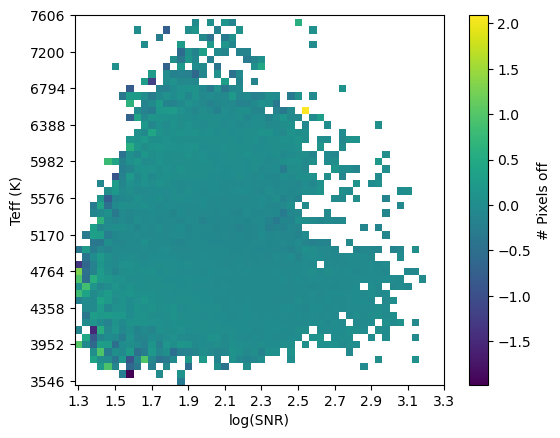

In [137]:
plt.imshow(average_pixels_off_snr_temp')
plt.xticks(0:5:length(snr_bins),round.(snr_bins,digits=1)[1:5:end])
plt.yticks(0:5:length(temp_bins),round.(Int16,temp_bins)[1:5:end])
plt.xlabel("log(SNR)")
plt.ylabel("Teff (K)")
plt.gca().invert_yaxis()
c = plt.colorbar()
c.set_label("# Pixels off")

In [139]:
average_pixels_off_snr = zeros(length(snr_bins) - 1);

for i in 1:length(snr_bins)-1
    mask =  snr_bins[i] .< log10.(masked_snrs) .< snr_bins[i + 1]
    average_signal = mean(masked_fluxes[:,mask], dims=2);

    itp = Interpolations.interpolate(average_signal[:,1], Interpolations.Lanczos());
    etp = Interpolations.extrapolate(itp,0)
    new_range = 1:0.01:2189
    smooth_signal = etp(new_range)

    # if i == 1 && j == 1
    #     plt.plot(smooth_signal[7300:7700])
    #     println(argmin(smooth_signal[7300:7700]))
    #     # xlim(730,770)
    # end

    signal_argmin_1 = 29000 + argmin(smooth_signal[29000:33000])
    signal_argmin_2 = 73000 + argmin(smooth_signal[73000:77000])
    signal_argmin_3 = 192000 + argmin(smooth_signal[192000:198000])

    if signal_argmin_2 == 73001
        average_pixels_off_snr[i] = NaN
    else
        offset1 = signal_argmin_1 - template_argmin_1
        offset2 = signal_argmin_2 - template_argmin_2
        offset3 = signal_argmin_3 - template_argmin_3
        average_pixels_off_snr[i] = ((offset1 + offset2 + offset3)/3)/100
    end
        
end

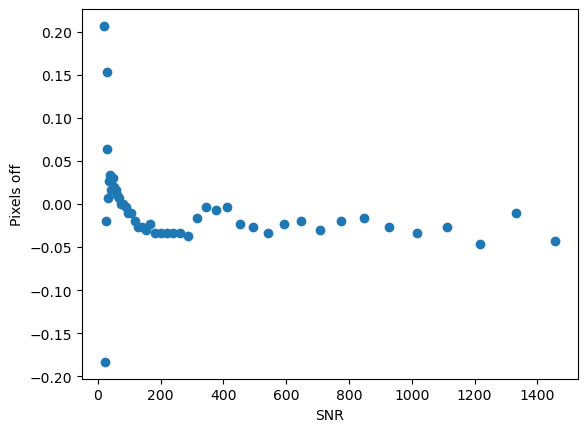

In [140]:
snr_bin_means = [10^((snr_bins[i] + snr_bins[i + 1])/2) for i in 1:length(snr_bins)-1];
plt.scatter(snr_bin_means, average_pixels_off_snr)
plt.xlabel("SNR")
plt.ylabel("Pixels off")
plt.show()

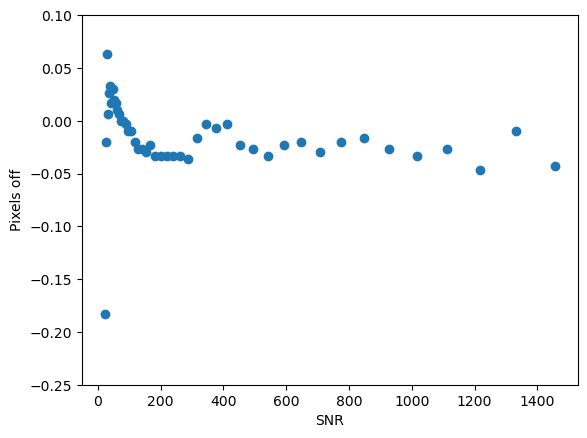

In [141]:
snr_bin_means = [10^((snr_bins[i] + snr_bins[i + 1])/2) for i in 1:length(snr_bins)-1];
plt.scatter(snr_bin_means, average_pixels_off_snr)
plt.xlabel("SNR")
plt.ylabel("Pixels off")
plt.ylim(-0.25, 0.1)
plt.show()

In [99]:
average_pixels_off_snr_logg = zeros(length(snr_bins)-1, length(logg_bins)-1);

@showprogress for i in 1:length(snr_bins)-1
    for j in 1:length(logg_bins)-1
        mask =  (snr_bins[i] .< log10.(masked_snrs) .< snr_bins[i + 1]) .& (logg_bins[j] .< masked_logg .< logg_bins[j + 1])
        average_signal = mean(masked_fluxes[:,mask], dims=2);
        # interp_linear = linear_interpolation(1:2189, average_signal[:,1])
        # smooth_signal = interp_linear(1:0.01:2189)
        
        itp = Interpolations.interpolate(average_signal[:,1], Interpolations.Lanczos());
        etp = Interpolations.extrapolate(itp,0)
        new_range = 1:0.01:2189
        smooth_signal = etp(new_range)
        
        # if i == 1 && j == 1
        #     plt.plot(smooth_signal[7300:7700])
        #     println(argmin(smooth_signal[7300:7700]))
        #     # xlim(730,770)
        # end
        
        signal_argmin_1 = 29000 + argmin(smooth_signal[29000:33000])
        signal_argmin_2 = 73000 + argmin(smooth_signal[73000:77000])
        signal_argmin_3 = 192000 + argmin(smooth_signal[192000:198000])
        
        if signal_argmin_2 == 73001
            average_pixels_off_snr_logg[i,j] = NaN
        else
            offset1 = signal_argmin_1 - template_argmin_1
            offset2 = signal_argmin_2 - template_argmin_2
            offset3 = signal_argmin_3 - template_argmin_3
            average_pixels_off_snr_logg[i,j] = ((offset1 + offset2 + offset3)/3)/100
        end
        
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:22


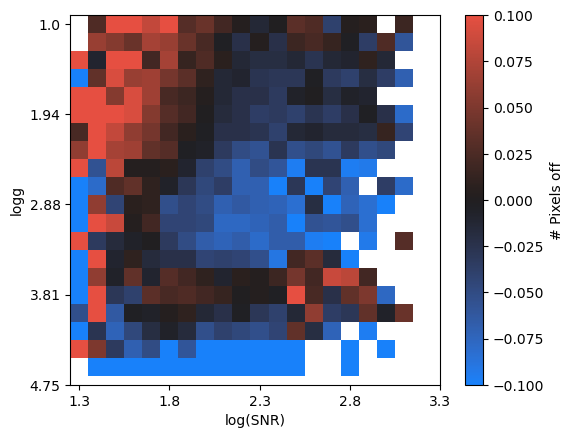

In [100]:
plt.imshow(average_pixels_off_snr_logg', vmin = -0.1, vmax = 0.1, cmap = "cet_bkr")
plt.xticks(0:5:length(snr_bins),round.(snr_bins,digits=1)[1:5:end])
plt.yticks(0:5:length(logg_bins),round.(logg_bins[1:5:end],digits=2))
plt.xlabel("log(SNR)")
plt.ylabel("logg")
# plt.gca().invert_yaxis()
c = plt.colorbar()
c.set_label("# Pixels off")

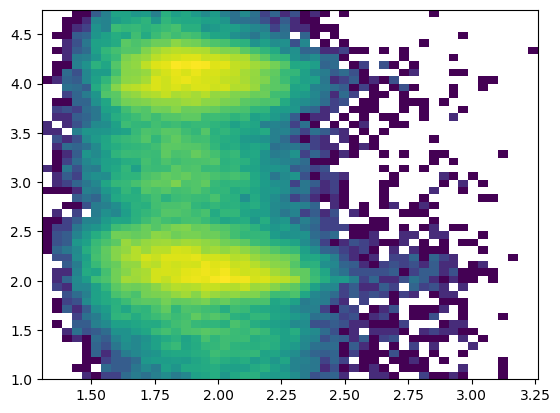

In [150]:
plt.hist2D(log10.(SNR_lst[msk_inter][ps1]), masked_logg, bins=50, norm = mplcolors.LogNorm())
plt.show()

## Fitting with Lorentzian

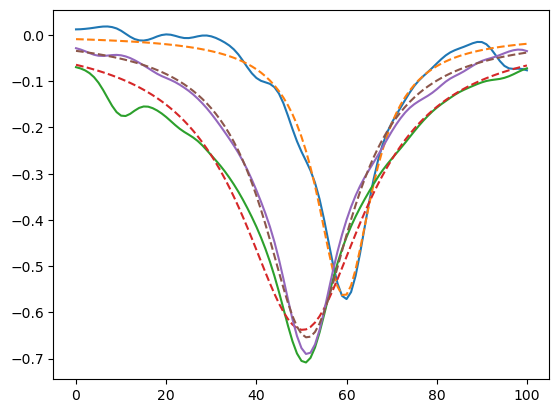

In [97]:
mask = (snr_bins[argmax(temp_hist)[1]] .< log10.(masked_snrs) .< snr_bins[argmax(temp_hist)[1] + 1]) .& (temp_bins[argmax(temp_hist)[2]] .< masked_teffs .< temp_bins[argmax(temp_hist)[2] + 1]) .& (masked_logg .< 3.5) 
template = mean(masked_fluxes[:,mask], dims=2);

this_curve = template[290:330]
# plt.plot(this_curve)

xmin_vec = [250,700,1900]
xcen_vec = [310,750,1950]
xmax_vec = [350,800,2000]

# param_mat = zeros(100,3,4)
param_mat = zeros(3, 3)

# @showprogress for meta_indx = 1:100
@showprogress for meta_indx = 1:1
    ydat = template.- 0.97

    for ind = 1:3
        xmin = xmin_vec[ind]
        xcen = xcen_vec[ind]
        xmax = xmax_vec[ind]

        p0 = [-0.5,xcen,2]

        @. gfit(x, p) = p[1] ./ (1 + ((x-p[2])/(p[3]/2))^2)

        plt.plot(ydat[xmin:xmax])
        # plt.plot(gfit(xmin:xmax, p0))

        fit = LsqFit.curve_fit(
            gfit, 
            xmin:xmax,
            ydat[xmin:xmax], 
            p0,
        )
        paramt = fit.param
        param_mat[ind,1:3] .= paramt
        plt.plot(gfit(xmin:xmax, param_mat[ind,:]), linestyle = "dashed")
    end
end


In [101]:
template_centers = param_mat[:,2]

3-element Vector{Float64}:
  309.4576231544555
  750.3005227912302
 1951.3471394184166

In [115]:
function fit_lorentzian(signal)
    xmin_vec = [250,700,1900]
    xcen_vec = [310,750,1950]
    xmax_vec = [350,800,2000]

    param_mat = zeros(3, 3)

    ydat = signal.- 0.97

    for ind = 1:3
        xmin = xmin_vec[ind]
        xcen = xcen_vec[ind]
        xmax = xmax_vec[ind]

        p0 = [-0.5,xcen,2]

        @. gfit(x, p) = p[1] ./ (1 + ((x-p[2])/(p[3]/2))^2)

        # plt.plot(ydat[xmin:xmax])
        # plt.plot(gfit(xmin:xmax, p0))

        fit = LsqFit.curve_fit(
            gfit, 
            xmin:xmax,
            ydat[xmin:xmax], 
            p0,
        )
        paramt = fit.param
        param_mat[ind,1:3] .= paramt
        # plt.plot(gfit(xmin:xmax, param_mat[ind,:]), linestyle = "dashed")
    end
    return param_mat[:,2]
end

fit_lorentzian (generic function with 1 method)

In [133]:
average_pixels_off_snr_logg = zeros(length(snr_bins)-1, length(logg_bins)-1);

@showprogress for i in 1:length(snr_bins)-1
    for j in 1:length(logg_bins)-1
        mask =  (snr_bins[i] .< log10.(masked_snrs) .< snr_bins[i + 1]) .& (logg_bins[j] .< masked_logg .< logg_bins[j + 1])
        average_signal = mean(masked_fluxes[:,mask], dims=2);
        # interp_linear = linear_interpolation(1:2189, average_signal[:,1])
        # smooth_signal = interp_linear(1:0.01:2189)
        if size(masked_fluxes[:,mask])[2] > 0 # check if there are actually spectra in the bin
            centers = fit_lorentzian(average_signal)
            offsets = centers .- template_centers
            average_pixels_off_snr_logg[i,j] = mean(offsets)
        else
            average_pixels_off_snr_logg[i,j] = NaN
        end
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


In [134]:
average_pixels_off_snr_logg

50×50 Matrix{Float64}:
 NaN          NaN          NaN           …  NaN          NaN
 NaN          NaN          NaN              NaN          NaN
 NaN          NaN          NaN                0.416187   NaN
 NaN            0.0808155  NaN                0.0362357   -0.560878
   0.213215     0.363056     0.00119357      -0.488068    -0.341533
   0.317774   NaN            0.0830922   …   -0.0677868   -0.186741
  -0.0389173    0.106494    -0.0518776       -0.122224    -0.114559
  -0.0628812    0.0510571    0.031688        -0.0916528   -0.0656432
   0.0406295    0.0273512   -0.0117856       -0.129702    -0.11693
   0.095252     0.0368478   -0.0130598       -0.0369856   -0.0744577
   0.048254     0.0158959    0.068826    …   -0.0471024   -0.123364
   0.05864      0.0754858    0.054737        -0.0992823   -0.0783091
   0.0331155    0.0388591    0.0742816       -0.0888774   -0.108761
   ⋮                                     ⋱               
  -0.147092    -0.218615    -0.153195       NaN       

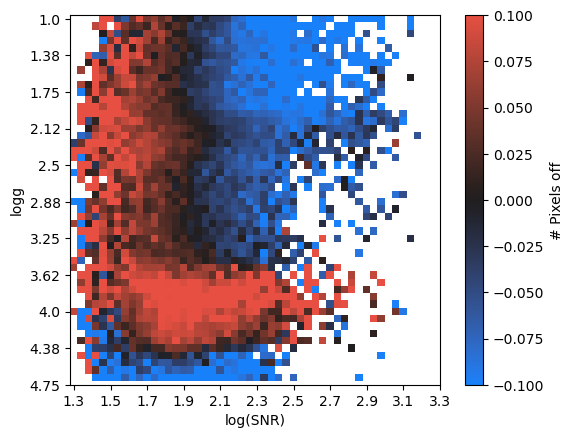

In [135]:
plt.imshow(average_pixels_off_snr_logg', vmin = -0.1, vmax = 0.1, cmap = "cet_bkr")
plt.xticks(0:5:length(snr_bins),round.(snr_bins,digits=1)[1:5:end])
plt.yticks(0:5:length(logg_bins),round.(logg_bins[1:5:end],digits=2))
plt.xlabel("log(SNR)")
plt.ylabel("logg")
# plt.gca().invert_yaxis()
c = plt.colorbar()
c.set_label("# Pixels off")

In [144]:
average_pixels_off_snr_temp = zeros(length(snr_bins)-1, length(temp_bins)-1);

for i in 1:length(snr_bins)-1
    for j in 1:length(temp_bins)-1
        mask = (snr_bins[i] .< log10.(masked_snrs) .< snr_bins[i + 1]) .& (temp_bins[j] .< masked_teffs .< temp_bins[j + 1])
        average_signal = mean(masked_fluxes[:,mask], dims=2);

        if size(masked_fluxes[:,mask])[2] > 0 # check if there are actually spectra in the bin
            centers = fit_lorentzian(average_signal)
            offsets = centers .- template_centers
            average_pixels_off_snr_temp[i,j] = mean(offsets)
        else
            average_pixels_off_snr_temp[i,j] = NaN
        end
        
    end
end

In [145]:
average_pixels_off_snr_temp

50×50 Matrix{Float64}:
 NaN  NaN          NaN           NaN           …  NaN         NaN         NaN
 NaN  NaN          NaN           NaN              NaN         NaN         NaN
 NaN  NaN          NaN            -0.765625       NaN         NaN         NaN
 NaN  NaN           -0.549019     -0.209218       NaN         NaN         NaN
 NaN  NaN           -0.00399668   -0.144577       NaN         NaN         NaN
 NaN  NaN           -0.219266     -0.00524186  …  NaN         NaN         NaN
 NaN   -0.0303876  NaN            -0.205006       NaN         NaN         NaN
 NaN   -0.533071    -0.143251     -0.0670784      NaN         NaN         NaN
 NaN  NaN           -0.00575005   -0.14958        NaN           0.587953  NaN
 NaN  NaN          NaN             0.148688       NaN         NaN         NaN
 NaN  NaN           -0.213181     -0.168314    …  NaN         NaN         NaN
 NaN   -0.178085   NaN            -0.197858         0.767407  NaN         NaN
 NaN  NaN            0.0420353    -0.0815

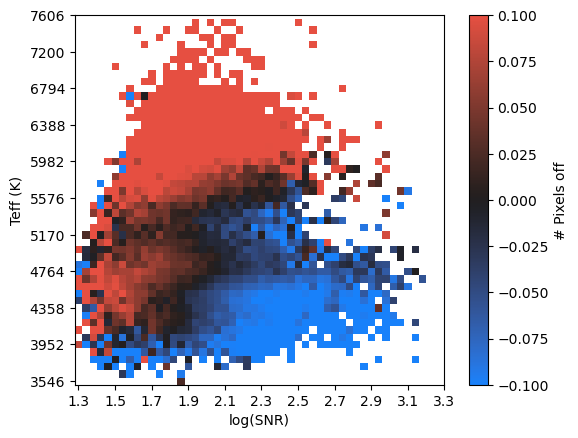

In [146]:
plt.imshow(average_pixels_off_snr_temp', vmin = -0.1, vmax = 0.1, cmap = "cet_bkr")
plt.xticks(0:5:length(snr_bins),round.(snr_bins,digits=1)[1:5:end])
plt.yticks(0:5:length(temp_bins),round.(Int16,temp_bins)[1:5:end])
plt.xlabel("log(SNR)")
plt.ylabel("Teff (K)")
plt.gca().invert_yaxis()
c = plt.colorbar()
c.set_label("# Pixels off")